In [3]:
# %pip install mlrose_hiive@git+https://github.com/hiive/mlrose/

In [2]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy.interpolate import interp1d

In [3]:
def gtid():
    return  903952938

## Fitness Problems

#### Helper - Plotter Functions

In [69]:
# Define a function to plot Fitness vs. Iteration
def plot_fitness_vs_iteration(title, curves, labels):
    plt.figure(figsize=(10, 6))
    for curve, label in zip(curves, labels):
        plt.plot(curve, label=label)
    plt.title(f'{title}: Fitness vs. Iteration')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
# Define a function to plot Fitness vs. Problem Size
def plot_fitness_vs_problem_size(title, problem_sizes, curves, labels):
    plt.figure(figsize=(10, 6))
    for curve, label in zip(curves, labels):
        plt.plot(problem_sizes, curve, label=label)
    plt.title(f'{title}: Fitness vs. Problem Size')
    plt.xlabel('Problem Size')
    plt.ylabel('Fitness')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()  
    
def plot_fitness_vs_iteration_grid(title, problem_sizes, results, labels, algorithms):
    fig, axes = plt.subplots(1, len(problem_sizes), figsize=(20, 5 * len(problem_sizes)))
    fig.suptitle(title, fontsize=16)
    
    for i, size in enumerate(problem_sizes):
        for algorithm in algorithms:
            curve = results[i][algorithm]['curve']
            axes[i].plot(curve, label=labels[algorithms.index(algorithm)])
        axes[i].set_title(f'Problem Size: {size}')
        axes[i].set_xlabel('Iterations')
        axes[i].set_ylabel('Fitness')
        axes[i].legend(loc='best')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
# Define a function to plot Function Evaluations (fevals)
def plot_fevals(title, curves, labels):
    plt.figure(figsize=(10, 6))
    for curve, label in zip(curves, labels):
        plt.plot(curve, label=label)
    plt.title(f'{title}: Function Evaluations')
    plt.xlabel('Iterations')
    plt.ylabel('Function Evaluations')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
# Define a function to plot Wall Clock Time
def plot_wall_clock_time(title, times, labels):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, times)
    plt.title(f'{title}: Wall Clock Time')
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.show()

#### Helper - Solve Fitness Function

In [65]:
def solve_problem_fp(problem, max_iters=10000):
    results = {}
    # Randomized Hill Climbing
    start_time = time.time()
    best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_iters=max_iters, curve=True, restarts=20 ,random_state=303)
    rhc_time = time.time() - start_time
    results['RHC'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': rhc_curve[:, 0], 'time': rhc_time, 'fevals': rhc_curve[:, 1]}
    
    # Simulated Annealing
    start_time = time.time()
    schedule = mlrose.ExpDecay()
    schedule.exp_const = 0.001
    best_state, best_fitness, sa_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_iters=max_iters, curve=True, random_state=42)
    sa_time = time.time() - start_time
    results['SA'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': sa_curve[:, 0], 'time': sa_time, 'fevals': sa_curve[:, 1]}
    
    # Genetic Algorithm
    start_time = time.time()
    best_state, best_fitness, ga_curve = mlrose.genetic_alg(problem, pop_size=50, mutation_prob=0.2, max_iters=max_iters, curve=True, random_state=42)
    ga_time = time.time() - start_time
    results['GA'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': ga_curve[:, 0], 'time': ga_time, 'fevals': ga_curve[:, 1]}
    
    # MIMIC
    start_time = time.time()
    best_state, best_fitness, mimic_curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_iters=max_iters, curve=True, random_state=42)
    mimic_time = time.time() - start_time
    results['MIMIC'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': mimic_curve[:, 0], 'time': mimic_time, 'fevals': mimic_curve[:, 1]}
    
    return results

def solve_problem_ff(problem, max_iters=10000):
    results = {}
    # Randomized Hill Climbing
    start_time = time.time()
    best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_iters=max_iters, curve=True, restarts=5 ,random_state=42)
    rhc_time = time.time() - start_time
    results['RHC'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': rhc_curve[:, 0], 'time': rhc_time, 'fevals': rhc_curve[:, 1]}
    
    # Simulated Annealing
    start_time = time.time()
    schedule = mlrose.ExpDecay()
    schedule.exp_const = 0.001
    best_state, best_fitness, sa_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_iters=max_iters, curve=True, random_state=42)
    sa_time = time.time() - start_time
    results['SA'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': sa_curve[:, 0], 'time': sa_time, 'fevals': sa_curve[:, 1]}
    
    # Genetic Algorithm
    start_time = time.time()
    best_state, best_fitness, ga_curve = mlrose.genetic_alg(problem, pop_size=50, mutation_prob=0.2, max_iters=max_iters, curve=True, random_state=42)
    ga_time = time.time() - start_time
    results['GA'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': ga_curve[:, 0], 'time': ga_time, 'fevals': ga_curve[:, 1]}
    
    # MIMIC
    start_time = time.time()
    best_state, best_fitness, mimic_curve = mlrose.mimic(problem, pop_size=50, keep_pct=0.5, max_iters=max_iters, curve=True, random_state=42)
    mimic_time = time.time() - start_time
    results['MIMIC'] = {'best_state': best_state, 'best_fitness': best_fitness, 'curve': mimic_curve[:, 0], 'time': mimic_time, 'fevals': mimic_curve[:, 1]}
    
    return results

### Fitness Four Peaks

In [83]:
fitness_four_peaks = mlrose.FourPeaks(t_pct=0.15)
problem_four_peaks = mlrose.DiscreteOpt(length=20, fitness_fn=fitness_four_peaks, maximize=True, max_val=2)

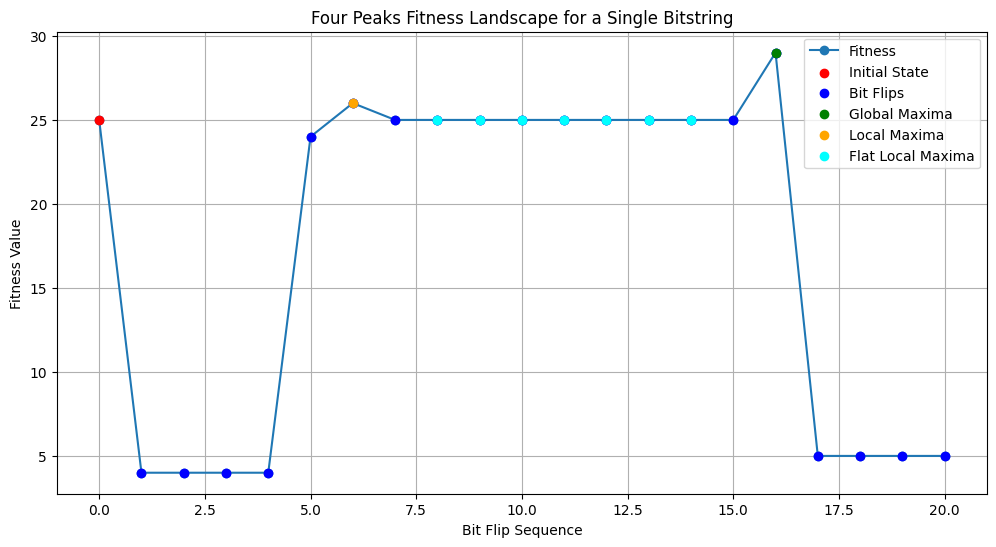

In [88]:
# Select a specific bitstring length
length = 20

# Generate an initial bitstring
# initial_bitstring = np.random.randint(2, size=length)
# initial_bitstring = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
# initial_bitstring = np.array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])
initial_bitstring = np.array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])


# Function to evaluate fitness of bitstring variations
def evaluate_bit_flips(bitstring, fitness_fn):
    fitness_values = []
    bitstrings = [bitstring.copy()]
    
    for i in range(len(bitstring)):
        new_bitstring = bitstring.copy()
        new_bitstring[i] = 1 - new_bitstring[i]  # Flip the bit
        bitstrings.append(new_bitstring)
    
    for bs in bitstrings:
        fitness_values.append(fitness_fn.evaluate(bs))
    
    return bitstrings, fitness_values

# Evaluate the bit flips for the initial bitstring
bitstrings, fitness_values = evaluate_bit_flips(initial_bitstring, fitness_four_peaks)

# Plot the fitness landscape
plt.figure(figsize=(12, 6))
plt.plot(fitness_values, marker='o', label='Fitness')
plt.title('Four Peaks Fitness Landscape for a Single Bitstring')
plt.xlabel('Bit Flip Sequence')
plt.ylabel('Fitness Value')
plt.grid(True)

# Highlight the initial state
plt.scatter([0], [fitness_values[0]], color='red', zorder=5, label='Initial State')

# Highlight the states after each bit flip
plt.scatter(range(1, len(fitness_values)), fitness_values[1:], color='blue', zorder=5, label='Bit Flips')

# Mark local maxima, global maxima, flat local maxima, and shoulders
max_fitness = max(fitness_values)
global_maxima_indices = [i for i, x in enumerate(fitness_values) if x == max_fitness]
local_maxima_indices = (np.diff(np.sign(np.diff(fitness_values))) < 0).nonzero()[0] + 1
local_maxima_indices = [i for i in local_maxima_indices if i not in global_maxima_indices]
plt.scatter(global_maxima_indices, [max_fitness]*len(global_maxima_indices), color='green', zorder=5, label='Global Maxima')
plt.scatter(local_maxima_indices, np.array(fitness_values)[local_maxima_indices], color='orange', zorder=5, label='Local Maxima')

# Identify flat local maxima and shoulders
flat_local_maxima_indices = [i for i, x in enumerate(fitness_values) if x > max_fitness * 0.7 and np.all(np.array(fitness_values[max(0, i-1):min(len(fitness_values), i+2)]) == x)]
shoulder_indices = [i for i in range(1, len(fitness_values)-1) if fitness_values[i] > fitness_values[i-1] and fitness_values[i] > fitness_values[i+1] and fitness_values[i] < max_fitness]

plt.scatter(flat_local_maxima_indices, np.array(fitness_values)[flat_local_maxima_indices], color='cyan', zorder=5, label='Flat Local Maxima')
# plt.scatter(shoulder_indices, np.array(fitness_values)[shoulder_indices], color='purple', zorder=5, label='Shoulders')

plt.legend()
plt.show()

In [85]:
results_four_peaks = solve_problem_fp(problem_four_peaks)

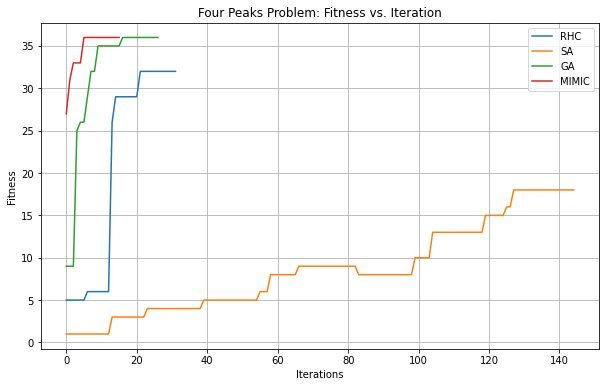

In [86]:
plot_fitness_vs_iteration("Four Peaks Problem", 
                          [results_four_peaks['RHC']['curve'], results_four_peaks['SA']['curve'], results_four_peaks['GA']['curve'], results_four_peaks['MIMIC']['curve']], 
                          ["RHC", "SA", "GA", "MIMIC"])

In [87]:
results_four_peaks['RHC']['fevals'].max(),results_four_peaks['SA']['fevals'].max(),results_four_peaks['GA']['fevals'].max(),results_four_peaks['MIMIC']['fevals'].max(),

(350.0, 230.0, 1434.0, 3420.0)

In [91]:
results_four_peaks['RHC']['curve'][-1], results_four_peaks['SA']['curve'][-1], results_four_peaks['GA']['curve'][-1], results_four_peaks['MIMIC']['curve'][-1]

(32.0, 18.0, 36.0, 36.0)

In [97]:
results_four_peaks['RHC']['curve'].shape[0], results_four_peaks['SA']['curve'].shape[0], results_four_peaks['GA']['curve'].shape[0], results_four_peaks['MIMIC']['curve'].shape[0]

(32, 145, 27, 16)

In [88]:
results_four_peaks['RHC']['time'],results_four_peaks['SA']['time'],results_four_peaks['GA']['time'],results_four_peaks['MIMIC']['time'],

(0.00500178337097168,
 0.004001140594482422,
 0.07200074195861816,
 1.8722145557403564)

In [78]:
# plot_fevals("Four Peaks Problem", 
#                           [results_four_peaks['RHC']['fevals'], results_four_peaks['SA']['fevals'], results_four_peaks['GA']['fevals'], results_four_peaks['MIMIC']['fevals']], 
#                           ["RHC", "SA", "GA", "MIMIC"])

In [79]:
# # Plot Wall Clock Time
# plot_wall_clock_time("Four Peaks Problem", 
#                      [results_four_peaks['RHC']['time'], results_four_peaks['SA']['time'], results_four_peaks['GA']['time'], results_four_peaks['MIMIC']['time']], 
#                      ["RHC", "SA", "GA", "MIMIC"])

In [98]:
# Plot Fitness vs. Problem Size
problem_sizes = [10, 20, 50, 100]

In [99]:
problem_set_four_peaks = []
for i in problem_sizes:
    problem_set_four_peaks.append(
    mlrose.DiscreteOpt(length=i, fitness_fn=fitness_four_peaks, maximize=True, max_val=2)
    )

In [100]:
result_four_peak_sets = []
for i in range(len(problem_sizes)):
    print(problem_sizes[i])
    result_four_peak_sets.append(
    solve_problem_fp(problem_set_four_peaks[i])
    )

10
20
50
100


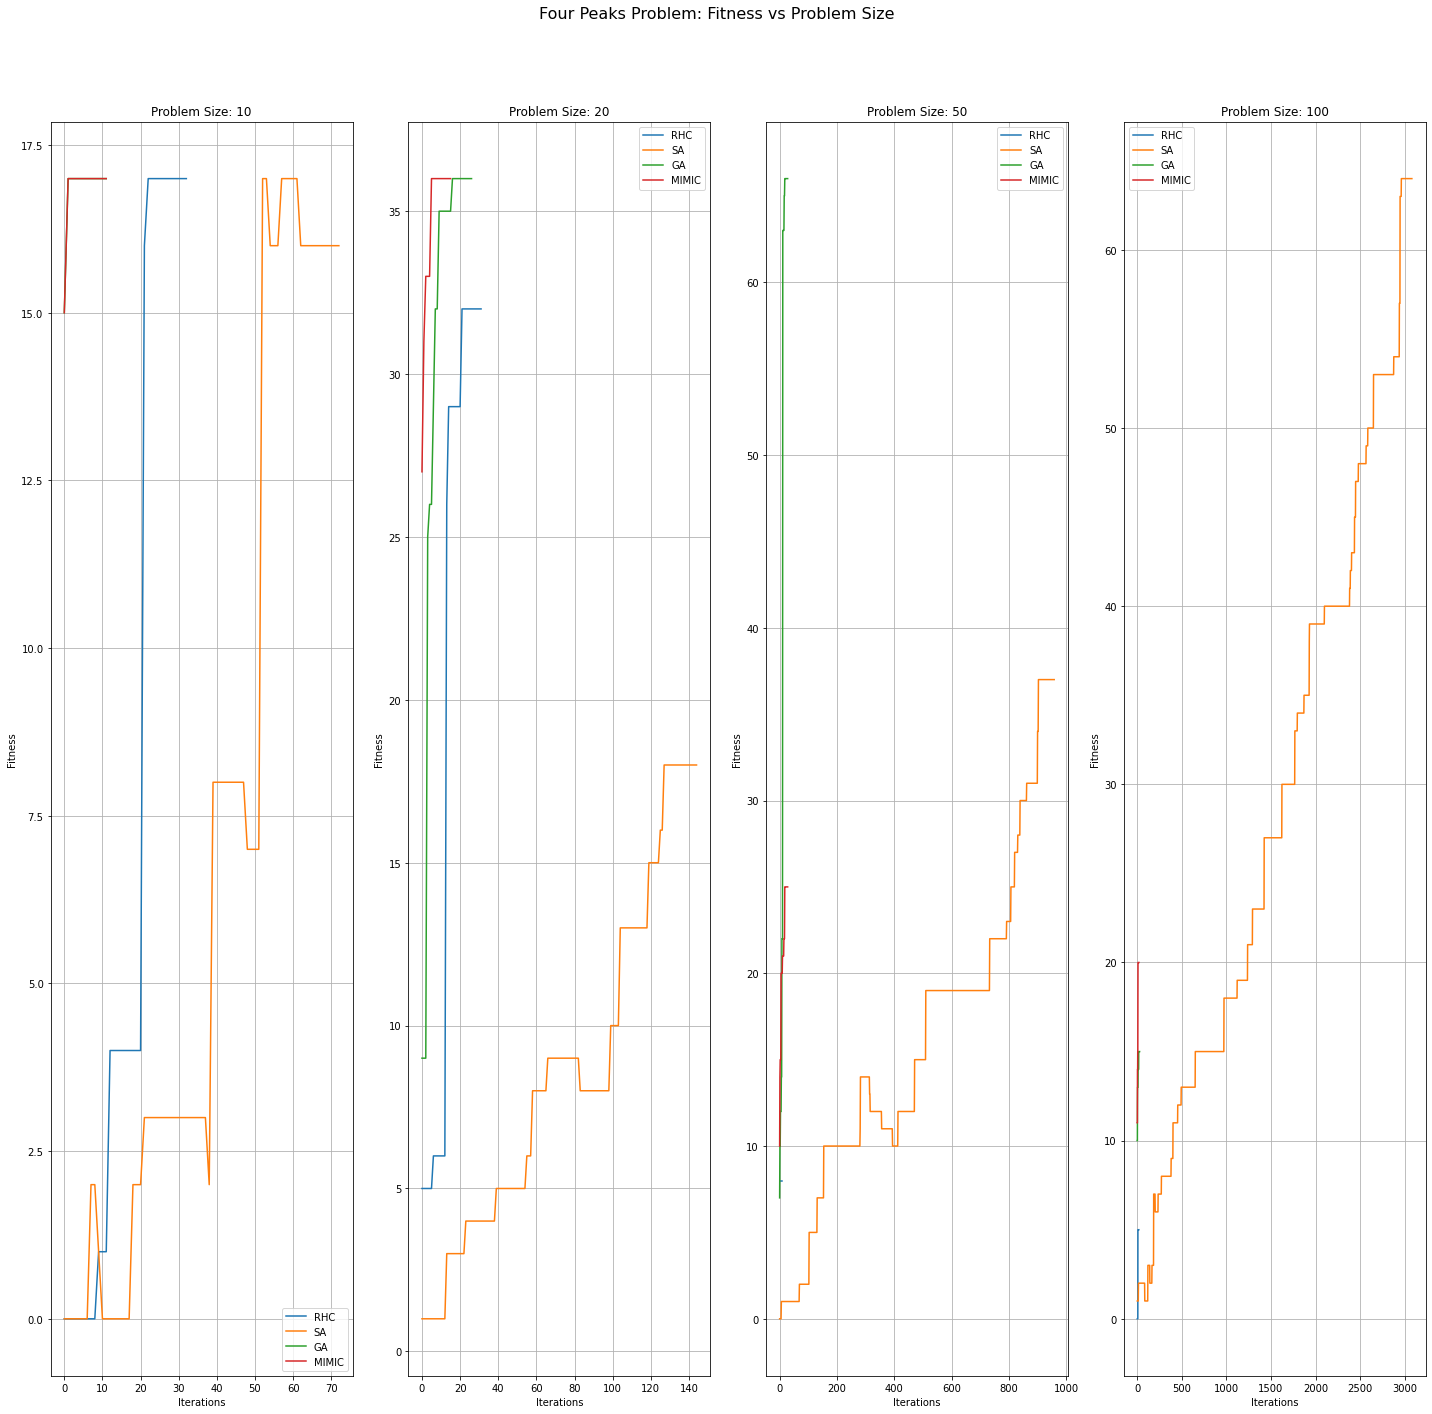

In [101]:
plot_fitness_vs_iteration_grid("Four Peaks Problem: Fitness vs Problem Size", 
                               problem_sizes, 
                               result_four_peak_sets, 
                               labels=["RHC", "SA", "GA", "MIMIC"], 
                               algorithms=["RHC", "SA", "GA", "MIMIC"]
                              )

### One Max Problem

In [21]:
# Define the One Max problem
fitness_one_max = mlrose.OneMax()
problem_one_max = mlrose.DiscreteOpt(length=10, fitness_fn=fitness_one_max, maximize=True, max_val=2)

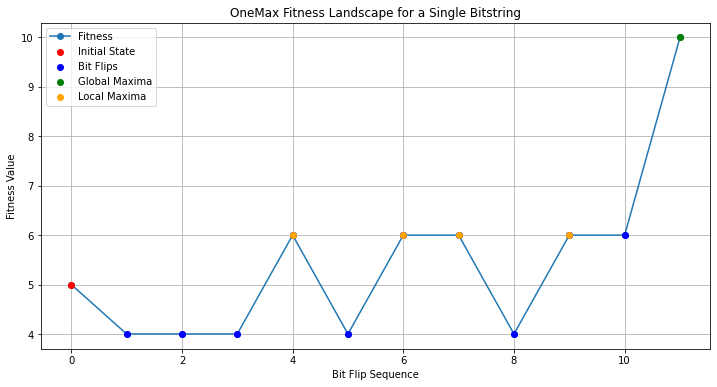

In [23]:
length=10
# Initial bitstring with potential local and global optima
initial_bitstring = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0])

# Function to evaluate fitness of bitstring variations
def evaluate_bit_flips(bitstring, fitness_fn):
    fitness_values = []
    bitstrings = [bitstring.copy()]
    
    for i in range(len(bitstring)):
        new_bitstring = bitstring.copy()
        new_bitstring[i] = 1 - new_bitstring[i]  # Flip the bit
        bitstrings.append(new_bitstring)
    
    for bs in bitstrings:
        fitness_values.append(fitness_fn.evaluate(bs))
    
    return bitstrings, fitness_values

# Evaluate the bit flips for the initial bitstring
bitstrings, fitness_values = evaluate_bit_flips(initial_bitstring, fitness_one_max)

# Ensure the bitstring fitness landscape reaches global maximum of 10
global_max_bitstring = np.ones(length, dtype=int)
bitstrings.append(global_max_bitstring)
fitness_values.append(fitness_one_max.evaluate(global_max_bitstring))

# Plot the fitness landscape
plt.figure(figsize=(12, 6))
plt.plot(fitness_values, marker='o', label='Fitness')
plt.title('OneMax Fitness Landscape for a Single Bitstring')
plt.xlabel('Bit Flip Sequence')
plt.ylabel('Fitness Value')
plt.grid(True)

# Highlight the initial state
plt.scatter([0], [fitness_values[0]], color='red', zorder=5, label='Initial State')

# Highlight the states after each bit flip
plt.scatter(range(1, len(fitness_values)-1), fitness_values[1:-1], color='blue', zorder=5, label='Bit Flips')

# Mark local maxima, global maxima, and shoulders
max_fitness = max(fitness_values)
global_maxima_indices = [i for i, x in enumerate(fitness_values) if x == max_fitness]
local_maxima_indices = (np.diff(np.sign(np.diff(fitness_values))) < 0).nonzero()[0] + 1

plt.scatter(global_maxima_indices, [max_fitness]*len(global_maxima_indices), color='green', zorder=5, label='Global Maxima')
plt.scatter(local_maxima_indices, np.array(fitness_values)[local_maxima_indices], color='orange', zorder=5, label='Local Maxima')

plt.legend()
plt.show()

In [191]:
result_one_max = solve_problem(problem_one_max)

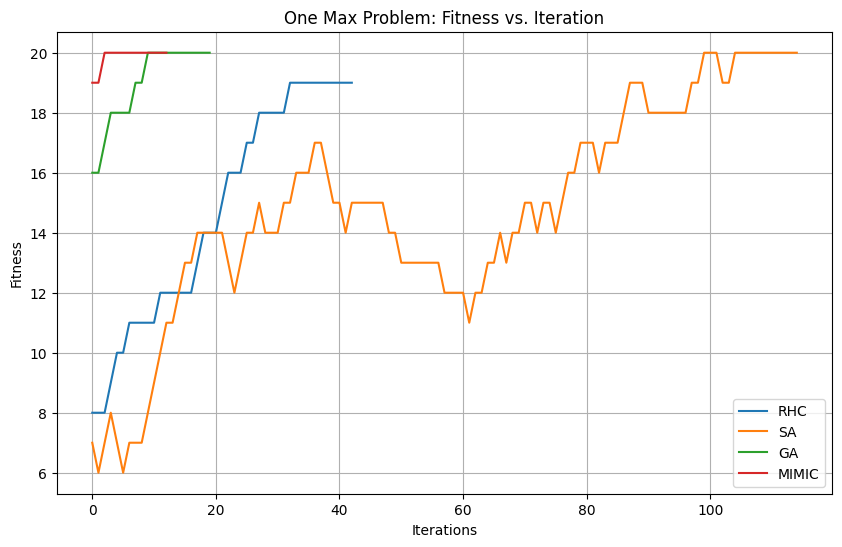

In [192]:
plot_fitness_vs_iteration("One Max Problem", 
                          [result_one_max['RHC']['curve'], result_one_max['SA']['curve'], result_one_max['GA']['curve'], result_one_max['MIMIC']['curve']], 
                          ["RHC", "SA", "GA", "MIMIC"])

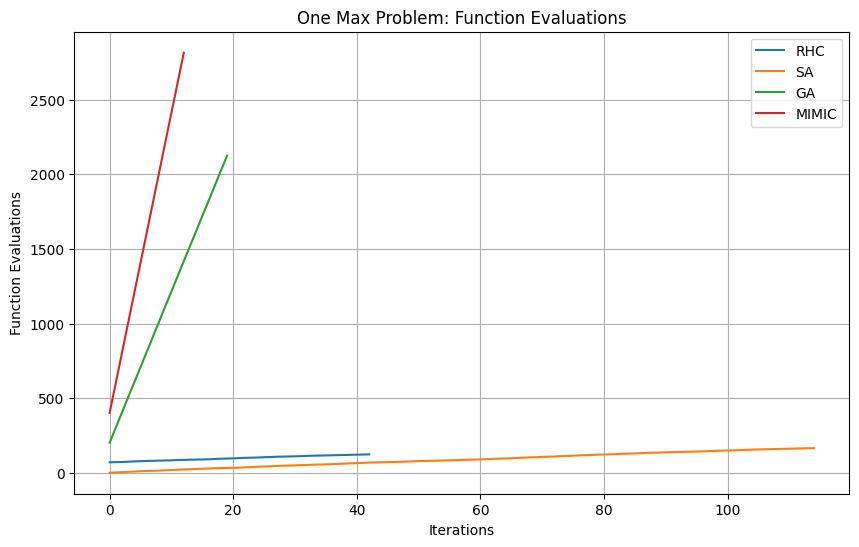

In [193]:
plot_fevals("One Max Problem", 
                          [result_one_max['RHC']['fevals'], result_one_max['SA']['fevals'], result_one_max['GA']['fevals'], result_one_max['MIMIC']['fevals']], 
                          ["RHC", "SA", "GA", "MIMIC"])

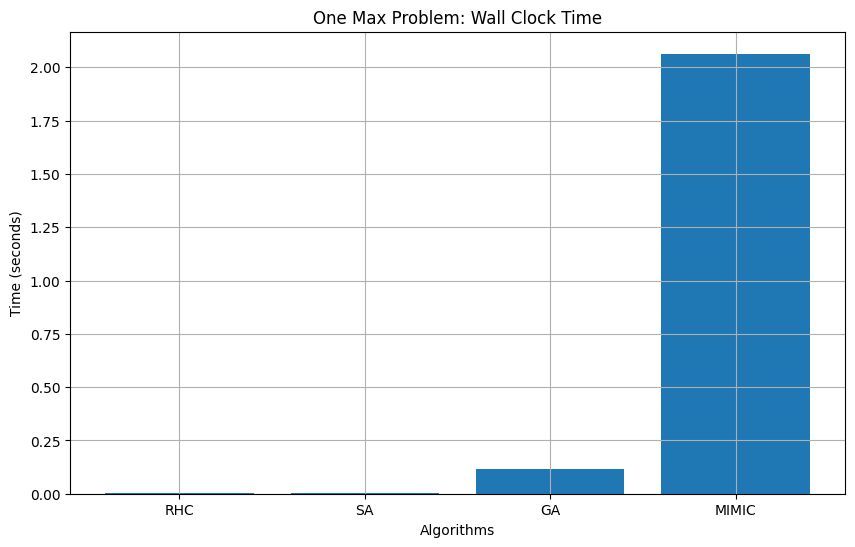

In [194]:
# Plot Wall Clock Time
plot_wall_clock_time("One Max Problem", 
                     [result_one_max['RHC']['time'], result_one_max['SA']['time'], result_one_max['GA']['time'], result_one_max['MIMIC']['time']], 
                     ["RHC", "SA", "GA", "MIMIC"])

In [195]:
problem_set_one_max = []
for i in problem_sizes:
    problem_set_one_max.append(
    mlrose.DiscreteOpt(length=i, fitness_fn=fitness_one_max, maximize=True, max_val=2)
    )

In [106]:
result_one_max_sets = []
for i in range(len(problem_sizes)):
    print(problem_sizes[i])
    result_one_max_sets.append(
    solve_problem_fp(problem_set_one_max[i])
    )

10


NameError: name 'problem_set_one_max' is not defined

IndexError: list index out of range

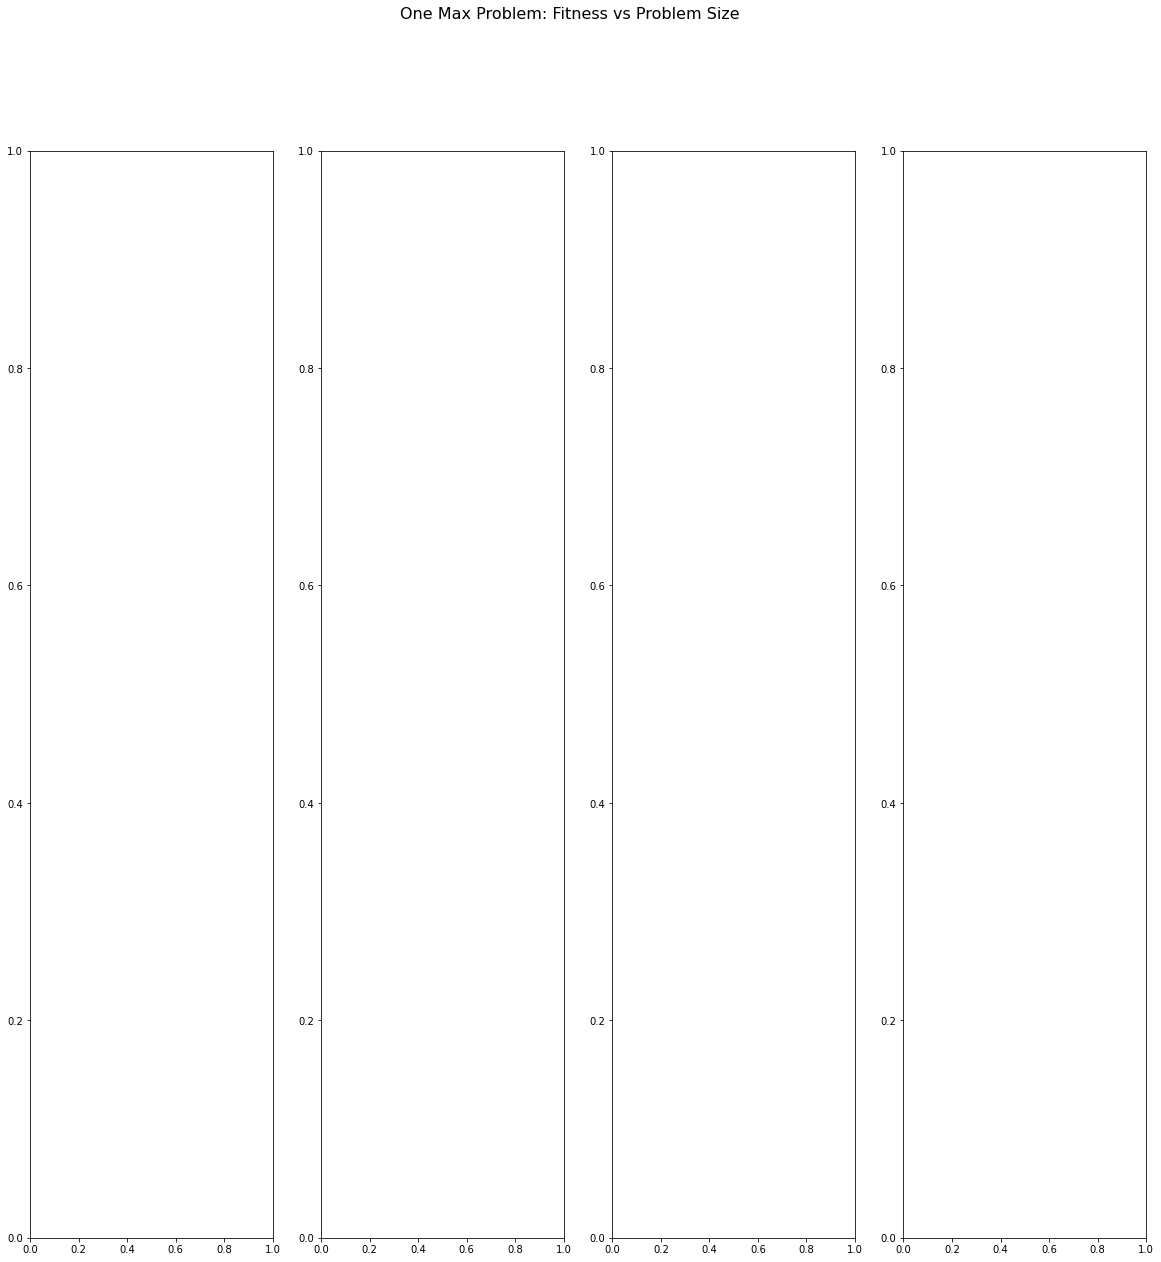

In [107]:
plot_fitness_vs_iteration_grid("One Max Problem: Fitness vs Problem Size", 
                               problem_sizes, 
                               result_one_max_sets, 
                               labels=["RHC", "SA", "GA", "MIMIC"], 
                               algorithms=["RHC", "SA", "GA", "MIMIC"]
                              )

In [198]:
'''
Comment: Both one max and 4 peaks - GA performs better than SA
Checking flip flop bits
'''

'\nComment: Both one max and 4 peaks - GA performs better than SA\nChecking flip flop bits\n'

### Flip Flop

In [102]:
# # Define the Flip-Flop fitness function
# class FlipFlop:
#     def __call__(self, state):
#         fitness = 0
#         for i in range(1, len(state)):
#             if state[i] != state[i-1]:
#                 fitness += 1
#         return fitness

# Create a custom fitness function object
fitness_flip_flop = mlrose.FlipFlop()

# Define optimization problem object
problem_flip_flop = mlrose.DiscreteOpt(length=20, fitness_fn=fitness_flip_flop, maximize=True, max_val=2)

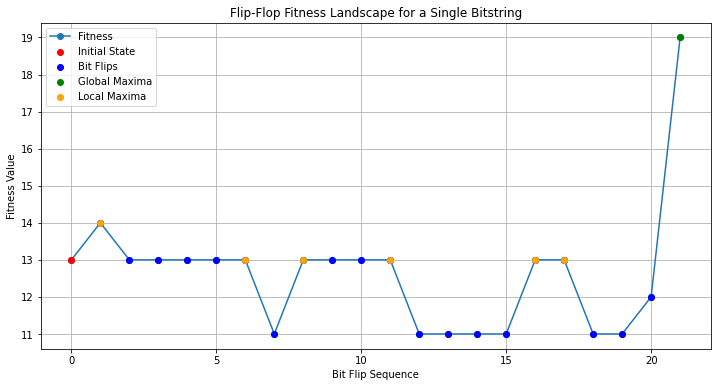

In [26]:
# Initial bitstring with potential local and global optima
initial_bitstring = np.array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

# Function to evaluate fitness of bitstring variations
def evaluate_bit_flips(bitstring, fitness_fn):
    fitness_values = []
    bitstrings = [bitstring.copy()]
    
    for i in range(len(bitstring)):
        new_bitstring = bitstring.copy()
        new_bitstring[i] = 1 - new_bitstring[i]  # Flip the bit
        bitstrings.append(new_bitstring)
    
    for bs in bitstrings:
        fitness_values.append(fitness_fn.evaluate(bs))
    
    return bitstrings, fitness_values

# Evaluate the bit flips for the initial bitstring
bitstrings, fitness_values = evaluate_bit_flips(initial_bitstring, fitness_flip_flop)

# Ensure the bitstring fitness landscape reaches the maximum possible value
global_max_bitstring = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
bitstrings.append(global_max_bitstring)
fitness_values.append(fitness_flip_flop.evaluate(global_max_bitstring))

# Plot the fitness landscape
plt.figure(figsize=(12, 6))
plt.plot(fitness_values, marker='o', label='Fitness')
plt.title('Flip-Flop Fitness Landscape for a Single Bitstring')
plt.xlabel('Bit Flip Sequence')
plt.ylabel('Fitness Value')
plt.grid(True)

# Highlight the initial state
plt.scatter([0], [fitness_values[0]], color='red', zorder=5, label='Initial State')

# Highlight the states after each bit flip
plt.scatter(range(1, len(fitness_values)-1), fitness_values[1:-1], color='blue', zorder=5, label='Bit Flips')

# Mark local maxima, global maxima, and shoulders
max_fitness = max(fitness_values)
global_maxima_indices = [i for i, x in enumerate(fitness_values) if x == max_fitness]
local_maxima_indices = (np.diff(np.sign(np.diff(fitness_values))) < 0).nonzero()[0] + 1

plt.scatter(global_maxima_indices, [max_fitness]*len(global_maxima_indices), color='green', zorder=5, label='Global Maxima')
plt.scatter(local_maxima_indices, np.array(fitness_values)[local_maxima_indices], color='orange', zorder=5, label='Local Maxima')

plt.legend()
plt.show()

In [103]:
result_flip_flop = solve_problem_ff(problem_flip_flop)

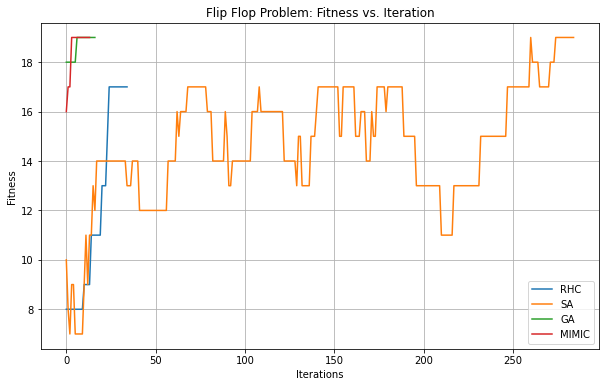

In [104]:
plot_fitness_vs_iteration("Flip Flop Problem", 
                          [result_flip_flop['RHC']['curve'], result_flip_flop['SA']['curve'], result_flip_flop['GA']['curve'], result_flip_flop['MIMIC']['curve']], 
                          ["RHC", "SA", "GA", "MIMIC"])

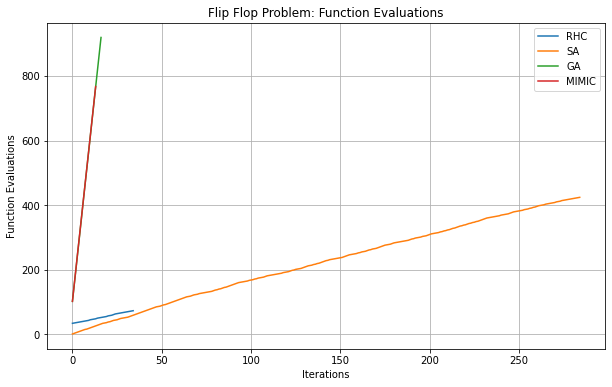

In [105]:
plot_fevals("Flip Flop Problem", 
                          [result_flip_flop['RHC']['fevals'], result_flip_flop['SA']['fevals'], result_flip_flop['GA']['fevals'], result_flip_flop['MIMIC']['fevals']], 
                          ["RHC", "SA", "GA", "MIMIC"])

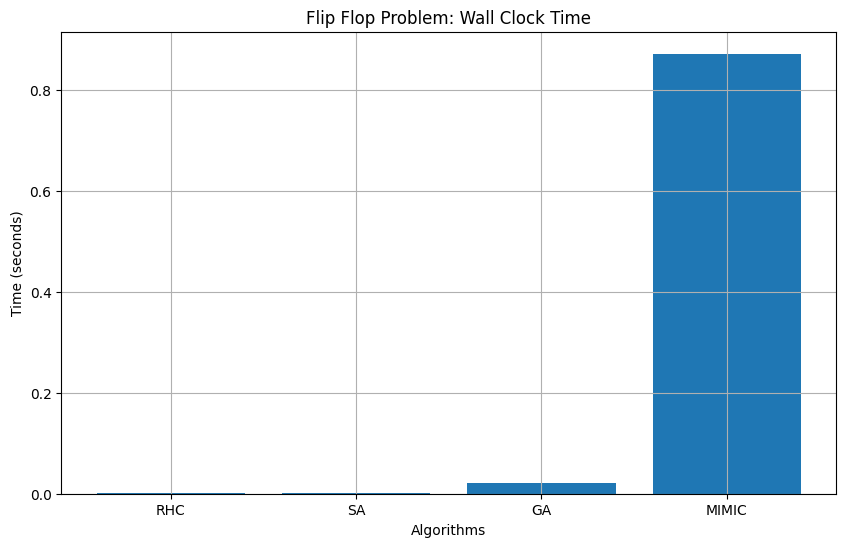

In [203]:
# Plot Wall Clock Time
plot_wall_clock_time("Flip Flop Problem", 
                     [result_flip_flop['RHC']['time'], result_flip_flop['SA']['time'], result_flip_flop['GA']['time'], result_flip_flop['MIMIC']['time']], 
                     ["RHC", "SA", "GA", "MIMIC"])

In [108]:
result_flip_flop['RHC']['fevals'].max(),result_flip_flop['SA']['fevals'].max(),result_flip_flop['GA']['fevals'].max(),result_flip_flop['MIMIC']['fevals'].max(),

(73.0, 424.0, 919.0, 767.0)

In [109]:
result_flip_flop['RHC']['curve'][-1], result_flip_flop['SA']['curve'][-1], result_flip_flop['GA']['curve'][-1], result_flip_flop['MIMIC']['curve'][-1]

(17.0, 19.0, 19.0, 19.0)

In [111]:
result_flip_flop['RHC']['curve'].shape[0], result_flip_flop['SA']['curve'].shape[0], result_flip_flop['GA']['curve'].shape[0], result_flip_flop['MIMIC']['curve'].shape[0]

(35, 285, 17, 14)

In [110]:
result_flip_flop['RHC']['time'],result_flip_flop['SA']['time'],result_flip_flop['GA']['time'],result_flip_flop['MIMIC']['time'],

(0.010001182556152344,
 0.02901744842529297,
 0.09454679489135742,
 1.9504103660583496)

In [121]:
problem_set_flip_flop = []
for i in problem_sizes:
    problem_set_flip_flop.append(
    mlrose.DiscreteOpt(length=i, fitness_fn=fitness_flip_flop, maximize=True, max_val=2)
    )

In [120]:
problem_sizes=[20, 50, 100, 200]

In [122]:
result_flip_flop_sets = []
for i in range(len(problem_sizes)):
    print(problem_sizes[i])
    result_flip_flop_sets.append(
    solve_problem_ff(problem_set_flip_flop[i])
    )

20
50
100
200


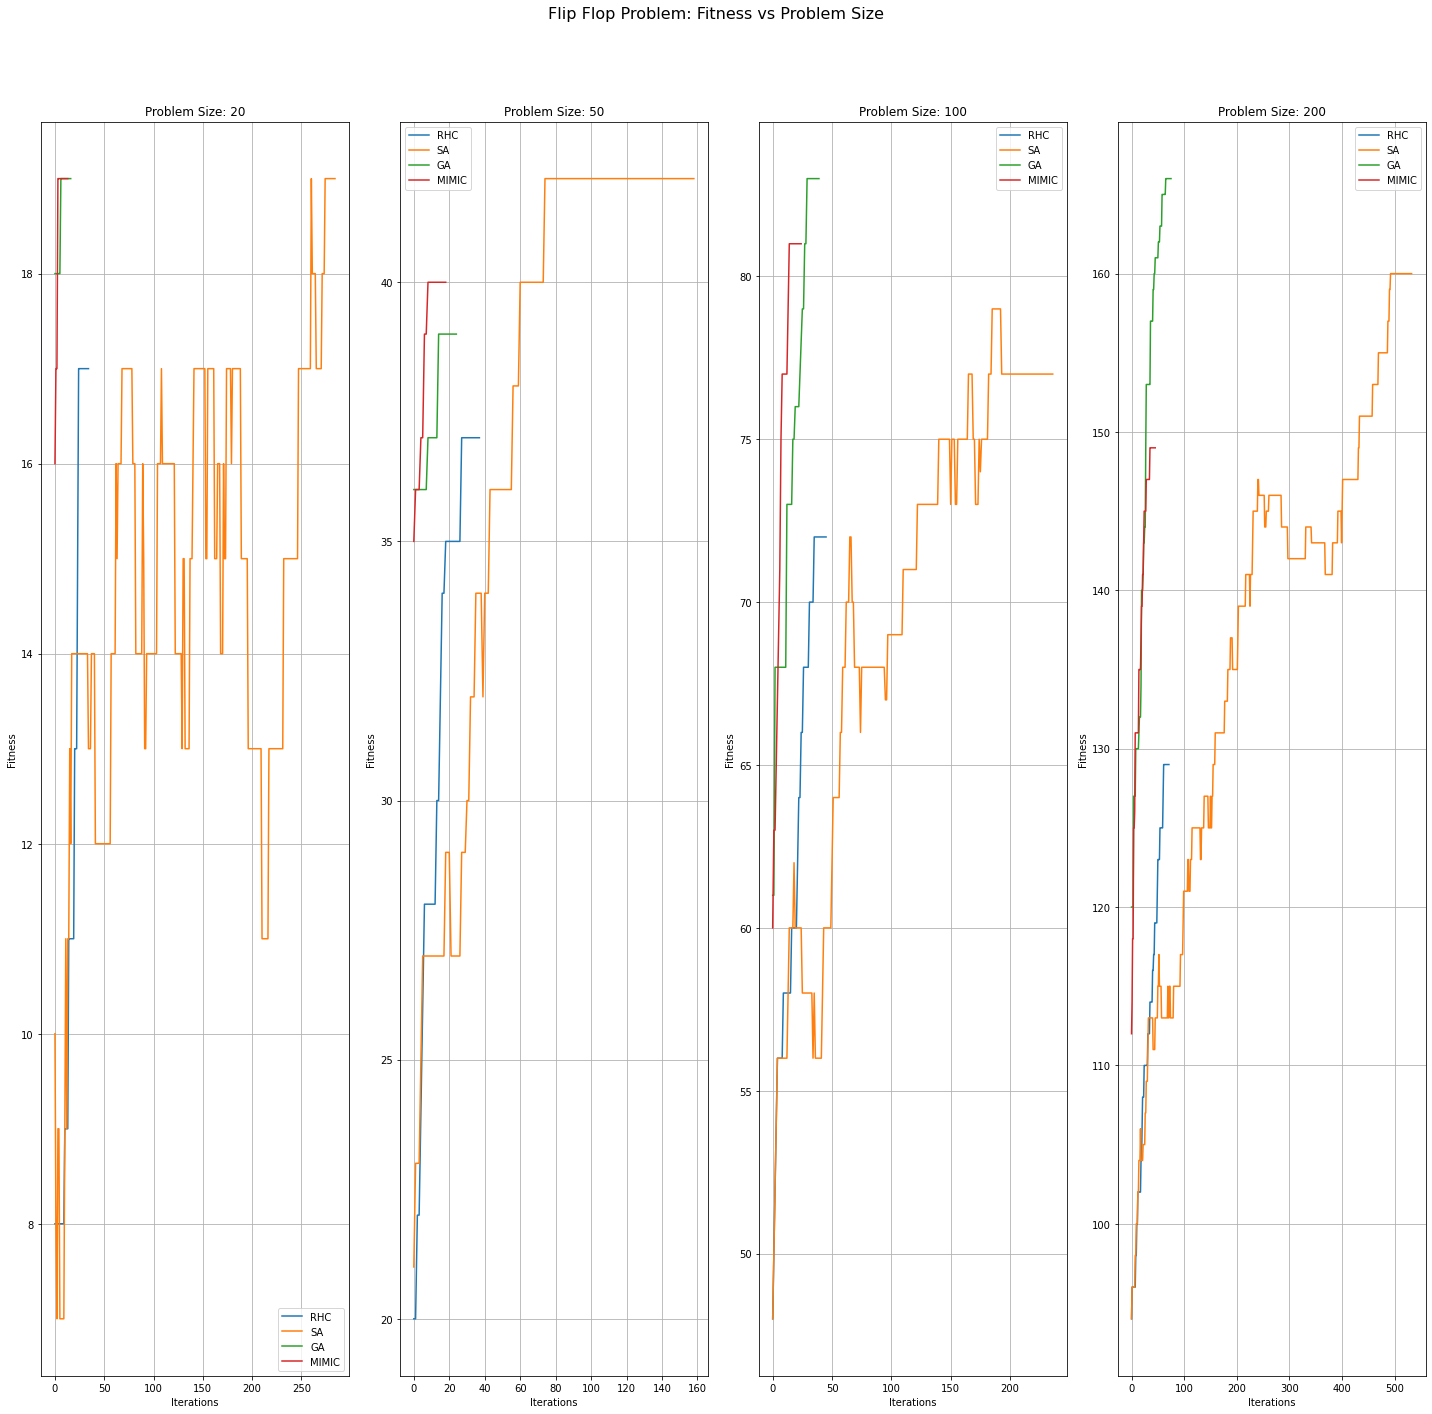

In [123]:
plot_fitness_vs_iteration_grid("Flip Flop Problem: Fitness vs Problem Size", 
                               problem_sizes, 
                               result_flip_flop_sets, 
                               labels=["RHC", "SA", "GA", "MIMIC"], 
                               algorithms=["RHC", "SA", "GA", "MIMIC"]
                              )

### Improve Performance on 4 peaks and Flip Flop by Hyperparameter tuning

In [27]:
def tune_rhc(problem, restarts, random_states, max_iters):
    results = {'restarts': [], 'random_state': [], 'fitness': []}
    for restart in restarts:
        for random_state in random_states:
            _, best_fitness, _ = mlrose.random_hill_climb(problem, restarts=restart, max_iters=max_iters, random_state=random_state)
            results['restarts'].append(restart)
            results['random_state'].append(random_state)
            results['fitness'].append(best_fitness)
    return results

# Define a function to tune SA hyperparameters
def tune_sa(problem, init_temps, decay_rates, cooling_schedules, min_temps, exp_consts, max_iters):
    results = {'init_temp': [], 'decay_rate': [], 'cooling_schedule': [], 'min_temp': [], 'exp_const': [], 'fitness': []}
    for init_temp in init_temps:
        for decay_rate in decay_rates:
            for schedule in cooling_schedules:
                for min_temp in min_temps:
                    for exp_const in exp_consts:
                        schedule.min_temp = min_temp
                        if isinstance(schedule, mlrose.ExpDecay):
                            schedule.exp_const = exp_const
                        _, best_fitness, _ = mlrose.simulated_annealing(problem, schedule=schedule, max_iters=max_iters, random_state=42)
                        results['init_temp'].append(init_temp)
                        results['decay_rate'].append(decay_rate)
                        results['cooling_schedule'].append(type(schedule).__name__)
                        results['min_temp'].append(min_temp)
                        results['exp_const'].append(exp_const)
                        results['fitness'].append(best_fitness)
    return results

# Define a function to tune GA hyperparameters
def tune_ga(problem, pop_sizes, mutation_probs, max_iters):
    results = {'pop_size': [], 'mutation_prob': [], 'fitness': []}
    for pop_size in pop_sizes:
        for mutation_prob in mutation_probs:
            _, best_fitness, _ = mlrose.genetic_alg(problem, pop_size=pop_size, mutation_prob=mutation_prob, 
                                                    max_iters=max_iters, random_state=42)
            results['pop_size'].append(pop_size)
            results['mutation_prob'].append(mutation_prob)
            results['fitness'].append(best_fitness)
    return results

# Define a function to tune MIMIC hyperparameters
def tune_mimic(problem, pop_sizes, keep_pcts, max_iters):
    results = {'pop_size': [], 'keep_pct': [], 'fitness': []}
    for pop_size in pop_sizes:
        for keep_pct in keep_pcts:
            _, best_fitness, _ = mlrose.mimic(problem, pop_size=pop_size, keep_pct=keep_pct, 
                                              max_iters=max_iters, random_state=42)
            results['pop_size'].append(pop_size)
            results['keep_pct'].append(keep_pct)
            results['fitness'].append(best_fitness)
    return results
def tune_mimic(problem, pop_sizes, keep_pcts, max_iters):
    results = {'pop_size': [], 'keep_pct': [], 'fitness': []}
    for pop_size in pop_sizes:
        for keep_pct in keep_pcts:
            _, best_fitness, _ = mlrose.mimic(problem, pop_size=pop_size, keep_pct=keep_pct, 
                                              max_iters=max_iters, random_state=42)
            results['pop_size'].append(pop_size)
            results['keep_pct'].append(keep_pct)
            results['fitness'].append(best_fitness)
    return results

In [28]:
# Updated hyperparameter ranges
#RHC
restarts = [0, 5, 10, 20]
random_states = [42, 101, 202, 303]

#SA
init_temps = [1, 10, 50, 100, 200]
decay_rates = [0.95, 0.9, 0.85, 0.8, 0.75]
cooling_schedules = [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]
min_temps = [0.001, 0.01, 0.1]
exp_consts = [0.001, 0.01, 0.1]

#GA
pop_sizes = [50, 100, 200, 300]
mutation_probs = [0.1, 0.2, 0.3, 0.4]
max_iters = 10000

#MIMIC
keep_pcts = [0.05, 0.1, 0.2, 0.3, 0.5]

In [51]:
fitness_flip_flop = mlrose.FlipFlop()
problem_flip_flop = mlrose.DiscreteOpt(length=20, fitness_fn=fitness_flip_flop, maximize=True, max_val=2)

In [48]:
fitness_four_peaks = mlrose.FourPeaks(t_pct=0.15)
problem_four_peaks = mlrose.DiscreteOpt(length=20, fitness_fn=fitness_four_peaks, maximize=True, max_val=2)

In [52]:
print("FLIP FLOP")
# Tune hyperparameters
ff_results_rhc = tune_rhc(problem_flip_flop, restarts, random_states, max_iters)
ff_results_sa = tune_sa(problem_flip_flop, init_temps, decay_rates, cooling_schedules, min_temps, exp_consts, max_iters)
ff_results_ga = tune_ga(problem_flip_flop, pop_sizes, mutation_probs, max_iters)
ff_results_mimic = tune_mimic(problem_flip_flop, pop_sizes, keep_pcts, max_iters)

FLIP FLOP


In [63]:
ff_rhc= pd.DataFrame(ff_results_rhc).drop_duplicates(subset=['fitness']).sort_values(by='fitness', ascending=False)
ff_sa= pd.DataFrame(ff_results_sa).drop_duplicates(subset=['fitness']).sort_values(by='fitness', ascending=False)
ff_ga= pd.DataFrame(ff_results_ga).drop_duplicates(subset=['fitness']).sort_values(by='fitness', ascending=False)
ff_mimic= pd.DataFrame(ff_results_mimic).drop_duplicates(subset=['fitness']).sort_values(by='fitness', ascending=False)

In [54]:
pd.DataFrame(ff_results_mimic).head(10)

,pop_size,keep_pct,fitness
0,50,0.05,18.0
1,50,0.10,17.0
2,50,0.20,18.0
3,50,0.30,18.0
4,50,0.50,19.0
5,100,0.05,18.0
6,100,0.10,18.0
7,100,0.20,17.0
8,100,0.30,19.0
9,100,0.50,19.0


In [64]:
ff_rhc.head(), ff_sa.head(), ff_ga.head(), ff_mimic.head()

(    restarts  random_state  fitness
 11        10           303     19.0
 4          5            42     17.0
 5          5           101     16.0
 1          0           101     14.0
 0          0            42     12.0,
     init_temp  decay_rate cooling_schedule  min_temp  exp_const  fitness
 0           1        0.95         ExpDecay     0.001      0.001     19.0
 2           1        0.95         ExpDecay     0.001      0.100     18.0
 18          1        0.95       ArithDecay     0.001      0.001     17.0,
    pop_size  mutation_prob  fitness
 1        50            0.2     19.0
 0        50            0.1     18.0,
    pop_size  keep_pct  fitness
 4        50      0.50     19.0
 0        50      0.05     18.0
 1        50      0.10     17.0)

In [56]:
print("FOUR PEAKS PROBLEM")
# Tune hyperparameters
fp_results_rhc = tune_rhc(problem_four_peaks, restarts, random_states, max_iters)
fp_results_sa = tune_sa(problem_four_peaks, init_temps, decay_rates, cooling_schedules, min_temps, exp_consts, max_iters)
fp_results_ga = tune_ga(problem_four_peaks, pop_sizes, mutation_probs, max_iters)
fp_results_mimic = tune_mimic(problem_four_peaks, pop_sizes, keep_pcts, max_iters)

FOUR PEAKS PROBLEM


In [57]:
pd.DataFrame(fp_results_sa)

,init_temp,decay_rate,cooling_schedule,min_temp,exp_const,fitness
0,1,0.95,ExpDecay,0.001,0.001,18.0
1,1,0.95,ExpDecay,0.001,0.010,18.0
2,1,0.95,ExpDecay,0.001,0.100,18.0
3,1,0.95,ExpDecay,0.010,0.001,18.0
4,1,0.95,ExpDecay,0.010,0.010,18.0
...,...,...,...,...,...,...
670,200,0.75,ArithDecay,0.010,0.010,18.0
671,200,0.75,ArithDecay,0.010,0.100,18.0
672,200,0.75,ArithDecay,0.100,0.001,18.0
673,200,0.75,ArithDecay,0.100,0.010,18.0


In [62]:
fp_rhc= pd.DataFrame(fp_results_rhc).drop_duplicates(subset=['fitness']).sort_values(by='fitness', ascending=False)
fp_sa= pd.DataFrame(fp_results_sa).drop_duplicates(subset=['fitness']).sort_values(by='fitness', ascending=False)
fp_ga= pd.DataFrame(fp_results_ga).drop_duplicates(subset=['fitness']).sort_values(by='fitness', ascending=False)
fp_mimic= pd.DataFrame(fp_results_mimic).drop_duplicates(subset=['fitness']).sort_values(by='fitness', ascending=False)
fp_rhc.head(), fp_sa.head(), fp_ga.head(), fp_mimic.head(10).sort_values(by='fitness', ascending=False)

(    restarts  random_state  fitness
 15        20           303     32.0
 5          5           101     26.0
 6          5           202     25.0
 1          0           101      6.0
 4          5            42      4.0,
    init_temp  decay_rate cooling_schedule  min_temp  exp_const  fitness
 0          1        0.95         ExpDecay     0.001      0.001     18.0,
    pop_size  mutation_prob  fitness
 1        50            0.2     36.0
 2        50            0.3     35.0
 4       100            0.1     32.0
 0        50            0.1     31.0,
     pop_size  keep_pct  fitness
 12       200      0.20     36.0
 11       200      0.10     34.0
 6        100      0.10     32.0
 3         50      0.30     31.0
 8        100      0.30     30.0
 5        100      0.05     28.0
 2         50      0.20     10.0
 0         50      0.05      9.0
 4         50      0.50      6.0)

## Machine Learning Weight Optimization

In [126]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, auc


In [133]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
from ucimlrepo import fetch_ucirepo 
import numpy as np

In [141]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (c:\Users\manav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py)

In [ ]:
def load_dataset(test_size=0.2, random_state=42):
        id=891
        cdc_diabetes_health_indicators = fetch_ucirepo(id=id) 
        # data (as pandas dataframes) 
        X = cdc_diabetes_health_indicators.data.features 
        y = cdc_diabetes_health_indicators.data.targets
        temp  = X.copy()
        temp['Diabetes'] = y
        temp.drop_duplicates(inplace = True)
        # cols_to_drop = ['Smoker','NoDocbcCost','Sex', 'AnyHealthcare', 'Education', 'Income']
        # temp = temp.drop(columns=cols_to_drop)
        # Split the data into training and testing sets
        X,y = temp[[i for i in temp.columns if i!='Diabetes']], temp[['Diabetes']]
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

In [ ]:
def preprocess_data1(X, y, random_state=gtid()):
    """
    Preprocess the data by one-hot encoding non-binary categorical features, applying SMOTE, and scaling using RobustScaler.
    """
    categorical_features=[]
    # Identify categorical and numerical features
    for col in X.columns:
        if X[col].dtype == 'object' or len(X[col].unique()) < 10:  # Assuming categorical if less than 10 unique values
            categorical_features.append(col)
    
    # Remove binary features from numerical features list
    numerical_features = [col for col in X.columns if col not in categorical_features]

    # Define the preprocessor for the pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
            ('num', RobustScaler(), numerical_features)
        ]
    )
    # Apply the preprocessor to X
    X_preprocessed = preprocessor.fit_transform(X)
    
    nm = NearMiss(version = 1 , n_neighbors = 10)
    x_sm,y_sm= nm.fit_resample(X_preprocessed, y.values.ravel())

    return x_sm,y_sm

In [ ]:
x_tr, x_te, y_tr, y_te = load_dataset()
x_train, y_train= preprocess_data1(x_tr, y_tr)
x_test, y_test = preprocess_data1(x_te, y_te)

In [ ]:
x_train.shape

(56030, 51)

#### HYPERPARAMETER TUNING

In [138]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

NameError: name 'x_train' is not defined

In [ ]:
def tune_rhc(hidden_nodes_list, x_train, y_train, x_val, y_val, restarts_list, learning_rates, max_iters=200):
    best_fitness = -np.inf
    best_params = {}
    results = []

    for hidden_nodes in hidden_nodes_list:
        for restarts in restarts_list:
            for learning_rate in learning_rates:
                model_rhc = mlrose.NeuralNetwork(
                    hidden_nodes=hidden_nodes, activation='relu',
                    algorithm='random_hill_climb', max_iters=max_iters,
                    bias=True, is_classifier=True, learning_rate=learning_rate,
                    early_stopping=True, clip_max=5, max_attempts=50,
                    curve=True, restarts=restarts,
                    random_state=42
                )
                model_rhc.fit(x_train, y_train)
                fitness = model_rhc.score(x_val, y_val)
                results.append((hidden_nodes, restarts, learning_rate, fitness))
                if fitness > best_fitness:
                    best_fitness = fitness
                    best_params = {'hidden_nodes': hidden_nodes, 'restarts': restarts, 'learning_rate': learning_rate}

    return best_params, results

# Example usage
hidden_nodes_list = [[5], [10, 5], [10, 10], [20, 20]]
restarts_list = [0, 5, 10]
learning_rates = [0.01, 0.05, 0.1]
best_params_rhc, results_rhc = tune_rhc(hidden_nodes_list, x_train, y_train, x_val, y_val, restarts_list, learning_rates)
print(f"Best params for RHC: {best_params_rhc}")

In [ ]:
def tune_sa(hidden_nodes_list, x_train, y_train, x_val, y_val, schedules, learning_rates, max_iters=200):
    best_fitness = -np.inf
    best_params = {}
    results = []

    for hidden_nodes in hidden_nodes_list:
        for schedule in schedules:
            for learning_rate in learning_rates:
                model_sa = mlrose.NeuralNetwork(
                    hidden_nodes=hidden_nodes, activation='relu',
                    algorithm='simulated_annealing', max_iters=max_iters,
                    bias=True, is_classifier=True, learning_rate=learning_rate,
                    early_stopping=True, clip_max=5, max_attempts=50,
                    curve=True, schedule=schedule,
                    random_state=42
                )
                model_sa.fit(x_train, y_train)
                fitness = model_sa.score(x_val, y_val)
                results.append((hidden_nodes, schedule, learning_rate, fitness))
                if fitness > best_fitness:
                    best_fitness = fitness
                    best_params = {'hidden_nodes': hidden_nodes, 'schedule': schedule, 'learning_rate': learning_rate}

    return best_params, results

# Example usage
hidden_nodes_list = [[5], [10, 5], [10, 10]]
schedules = [mlrose.GeomDecay(), mlrose.ExpDecay(), mlrose.ArithDecay()]
learning_rates = [0.01, 0.05, 0.1]
best_params_sa, results_sa = tune_sa(hidden_nodes_list, x_train, y_train, x_val, y_val, schedules, learning_rates)
print(f"Best params for SA: {best_params_sa}")


In [ ]:
def tune_ga(hidden_nodes_list, x_train, y_train, x_val, y_val, pop_sizes, mutation_probs, learning_rates, max_iters=200):
    best_fitness = -np.inf
    best_params = {}
    results = []

    for hidden_nodes in hidden_nodes_list:
        for pop_size in pop_sizes:
            for mutation_prob in mutation_probs:
                for learning_rate in learning_rates:
                    model_ga = mlrose.NeuralNetwork(
                        hidden_nodes=hidden_nodes, activation='relu',
                        algorithm='genetic_alg', max_iters=max_iters,
                        bias=True, is_classifier=True, learning_rate=learning_rate,
                        early_stopping=True, clip_max=5, max_attempts=50,
                        curve=True, pop_size=pop_size, mutation_prob=mutation_prob,
                        random_state=42
                    )
                    model_ga.fit(x_train, y_train)
                    fitness = model_ga.score(x_val, y_val)
                    results.append((hidden_nodes, pop_size, mutation_prob, learning_rate, fitness))
                    if fitness > best_fitness:
                        best_fitness = fitness
                        best_params = {'hidden_nodes': hidden_nodes, 'pop_size': pop_size, 'mutation_prob': mutation_prob, 'learning_rate': learning_rate}

    return best_params, results

# Example usage
hidden_nodes_list = [[5], [10, 5], [10, 10]]
pop_sizes = [50, 100, 200]
mutation_probs = [0.1, 0.2, 0.3]
learning_rates = [0.01, 0.05, 0.1]
best_params_ga, results_ga = tune_ga(hidden_nodes_list, x_train, y_train, x_val, y_val, pop_sizes, mutation_probs, learning_rates)
print(f"Best params for GA: {best_params_ga}")


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def tune_mlp(hidden_layer_sizes_list, activations, learning_rates, x_train, y_train, x_val, y_val):
    best_fitness = -np.inf
    best_params = {}
    results = []

    for hidden_layer_sizes in hidden_layer_sizes_list:
        for activation in activations:
            for learning_rate in learning_rates:
                model_mlp = MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes, 
                    activation=activation, 
                    learning_rate_init=learning_rate, 
                    random_state=42,  
                    tol=0.001,
                    max_iter=200,
                    early_stopping=True
                )
                model_mlp.fit(x_train, y_train)
                y_pred = model_mlp.predict(x_val)
                fitness = accuracy_score(y_val, y_pred)
                results.append((hidden_layer_sizes, activation, learning_rate, fitness))
                if fitness > best_fitness:
                    best_fitness = fitness
                    best_params = {'hidden_layer_sizes': hidden_layer_sizes, 'activation': activation, 'learning_rate_init': learning_rate}

    return best_params, results

activations = ['relu', 'tanh', 'logistic']
learning_rates = [10**(-2), 10**(-3), 10**(-4)]


best_params_mlp, results_mlp = tune_mlp(hidden_layer_sizes_list, activations, learning_rates, x_train, y_train, x_val, y_val)
print(f"Best params for MLP: {best_params_mlp}")


In [45]:
best_mlp = MLPClassifier(hidden_layer_sizes=(10, 10), 
                         activation='relu', 
                         learning_rate_init=10**(-2), 
                         random_state=42,  
                         tol=0.001)

In [46]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(best_mlp, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))


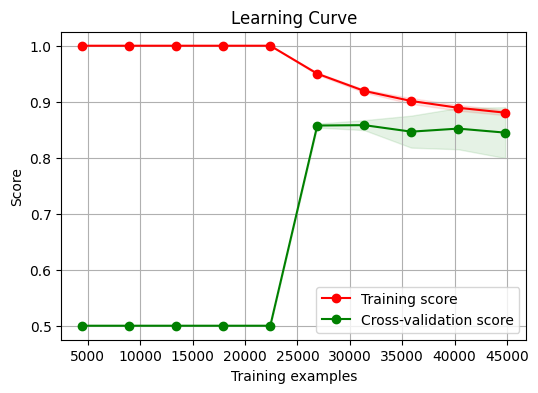

In [47]:
# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 4))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [48]:
print(f"Performance with Backpropagation - Adam Optimization")
# Evaluate on the test set
best_mlp.fit(x_train, y_train)
y_test_pred = best_mlp.predict(x_test)
print("Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_test_pred, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Precision: ", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_test_pred, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_test_pred))

Performance with Backpropagation - Adam Optimization
Test Set Evaluation:
F1 Score:  0.8689135882553629
Accuracy:  0.8695283818130471
Precision:  0.8765932515221739
Recall:  0.8695283818130471
ROC AUC:  0.8695283818130471


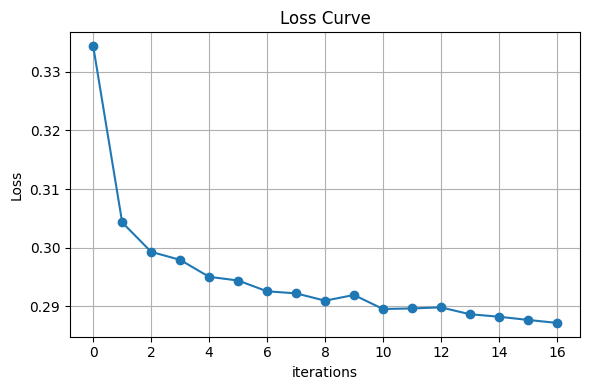

In [49]:
loss_curve = best_mlp.loss_curve_ 
plt.figure(figsize=(6, 4))  
plt.plot(loss_curve, marker='o')
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

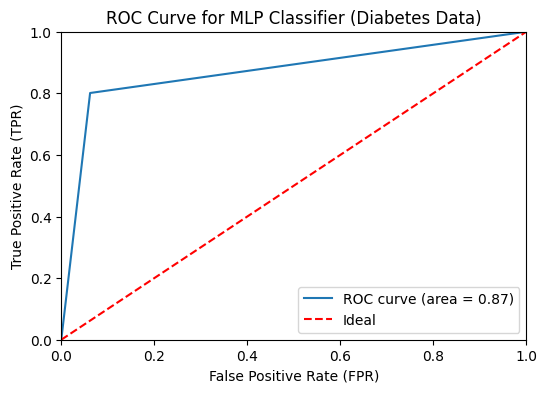

In [50]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Ideal')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for MLP Classifier (Diabetes Data)')
plt.legend(loc="lower right")
plt.show()

In [133]:
train_times = []
feval_curve = []

In [138]:
# Define the Neural Network with RHC
start_time = time.time()
model_rhc = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation='relu',
                                       algorithm='random_hill_climb', max_iters=200,
                                       bias=True, is_classifier=True, learning_rate=0.01,
                                       early_stopping=True, clip_max=5, max_attempts=50,
                                       curve=True,
                                    #    restarts =5,
                                       random_state=42)

In [139]:
# Train the model
model_rhc.fit(x_train, y_train)
end_time = time.time()


In [136]:
evaluations = model_rhc.fitness_curve  # or a method to calculate total evaluations
wall_clock_time = end_time - start_time
train_times.append(wall_clock_time)
feval_curve.append(evaluations)

In [140]:
# Predict and evaluate
y_pred_rhc = model_rhc.predict(x_test)
print("RHC Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_pred_rhc, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_rhc))
print("Precision: ", precision_score(y_test, y_pred_rhc, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_rhc, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_rhc))

RHC Test Set Evaluation:
F1 Score:  0.33266062328297263
Accuracy:  0.4463428410053657
Precision:  0.33158153497388576
Recall:  0.4463428410053657
ROC AUC:  0.44634284100536564


In [56]:
start_time = time.time()
# Define the Neural Network with SA
schedule = mlrose.ExpDecay()
model_sa = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation='relu',
                                      algorithm='simulated_annealing', max_iters=200,
                                      bias=True, is_classifier=True, learning_rate=0.01,
                                      early_stopping=True, clip_max=5, max_attempts=50,
                                      schedule=schedule, random_state=42)

# Train the model
model_sa.fit(x_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred_sa = model_sa.predict(x_test)
train_times.append(end_time-start_time)
feval_curve.append(model_sa.fitness_curve)

In [57]:
# Predict and evaluate
print("Simmulated Annealing Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_pred_sa, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_sa))
print("Precision: ", precision_score(y_test, y_pred_sa, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_sa, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_sa))

Simmulated Annealing Test Set Evaluation:
F1 Score:  0.33276281760747217
Accuracy:  0.4474018638802598
Precision:  0.3318225780138993
Recall:  0.4474018638802598
ROC AUC:  0.4474018638802599


In [150]:
start_time = time.time()

# Define the Neural Network with GA
model_ga = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation='relu',
                                      algorithm='genetic_alg', max_iters=200,
                                      bias=True, is_classifier=True, learning_rate=0.01,
                                      early_stopping=True, clip_max=5, max_attempts=50,
                                      pop_size=200, mutation_prob=0.1, random_state=42)

# Train the model
model_ga.fit(x_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred_ga = model_ga.predict(x_test)
train_times.append(end_time-start_time)
feval_curve.append(model_ga.fitness_curve)

In [151]:
# Predict and evaluate
print("Genetic Algorithm Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_pred_ga, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_ga))
print("Precision: ", precision_score(y_test, y_pred_ga, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_ga, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_ga))

Genetic Algorithm Test Set Evaluation:
F1 Score:  0.6965673402057617
Accuracy:  0.7174526969782548
Precision:  0.8000676716942257
Recall:  0.7174526969782548
ROC AUC:  0.7174526969782548


In [62]:
start_time = time.time()
# Define the Neural Network with MIMIC
model_mi = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation='relu',
                                      algorithm='gradient_descent', max_iters=200,
                                      bias=True, is_classifier=True, learning_rate=0.1,
                                      early_stopping=True, clip_max=5, max_attempts=50,
                                      pop_size=200, mutation_prob=0.1, random_state=42)

# Train the model
model_mi.fit(x_train, y_train)
end_time = time.time()
# Predict and evaluate
y_pred_mi = model_mi.predict(x_test)
train_times.append(end_time-start_time)
feval_curve.append(model_mi.fitness_curve)

In [63]:
# Predict and evaluate
print("Gradient Descent Test Set Evaluation:")
print("F1 Score: ", f1_score(y_test, y_pred_mi, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_mi))
print("Precision: ", precision_score(y_test, y_pred_mi, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_mi, average='weighted'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_mi))

Gradient Descent Test Set Evaluation:
F1 Score:  0.3333333333333333
Accuracy:  0.5
Precision:  0.25
Recall:  0.5
ROC AUC:  0.5


In [143]:
model_rhc.predicted_probs.shape

(14164, 1)

In [68]:
losses = [model_rhc.loss, model_sa.loss, model_ga.loss, model_mi.loss]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


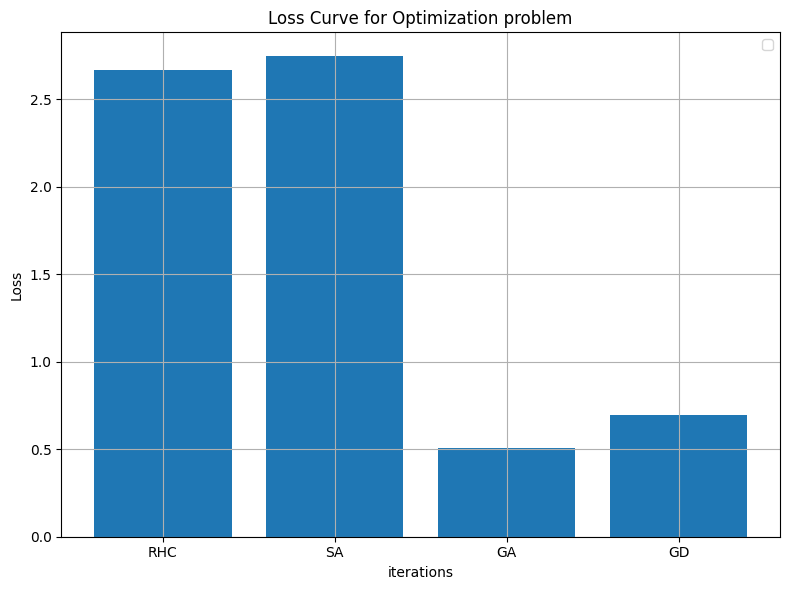

In [70]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
curves = [model_rhc.loss, model_sa.loss, model_ga.loss, model_mi.loss]
labels=['RHC', 'SA', 'GA', 'GD']
plt.bar(labels, losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.title("Loss Curve for Optimization problem")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


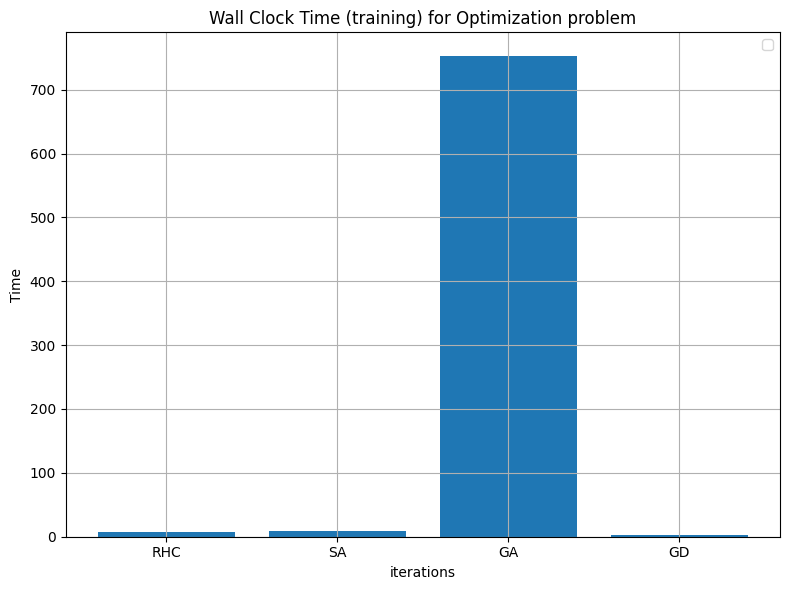

In [71]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
curves = [model_rhc.loss, model_sa.loss, model_ga.loss, model_mi.loss]
labels=['RHC', 'SA', 'GA', 'GD']
plt.bar(labels, train_times)
plt.xlabel("iterations")
plt.ylabel("Time")
plt.title("Wall Clock Time (training) for Optimization problem")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()